# Estimators

## Maximum Likelihood Estimator
## Laplacian Estimator

Allows you to derive a probability from things such as coin flips

> To fake or not to fake... the outcome will surprise you

In [4]:
import pandas as pd
import numpy as np
from __future__ import division

In [5]:
quiz_1_series = pd.Series([1, 0, 0, 1, 0 , 1])

In [11]:


def quiz_probability_of_heads_1(heads_series=quiz_1_series):
    return heads_series.sum()/len(heads_series)

quiz_probability_of_heads_1()

0.5

In [12]:
assert quiz_probability_of_heads_1()==0.5, 'Heads 3 times, tails 3 times, it is a fair coin; should be 0.5 not {}'.format(quiz_probability_of_heads_1())

In [13]:
quiz_2_series = pd.Series([1,1,  0, 1, 1])

In [14]:
def quiz_probability_of_heads_2():
    return quiz_probability_of_heads_1(quiz_2_series)
quiz_probability_of_heads_2()

0.8

In [18]:
assert quiz_probability_of_heads_2()==0.8, 'Heads 4 times out of 5 tosses;expected 0.8 not {}'.format(quiz_probability_of_heads_2())

## Empirical
 > Empirical means the same as observations
 > We observed 4 heads out of 5 tosses; 4/5 = 0.8

In [15]:
quiz_3_series = pd.Series(np.zeros(7))

In [16]:
def quiz_probability_of_heads_3():
    return quiz_probability_of_heads_1(quiz_3_series)
quiz_probability_of_heads_3()

0.0

In [19]:
assert quiz_probability_of_heads_3()==0, 'Never heads; expected prob of heads to be 0, not {}'.format(quiz_probability_of_heads_3())

In [22]:
def quiz_identify_estimator():
    """
    Because I use pandas, I stated the formula
    In a way consistent with the answer here:
    
        How can I answer this quiz question with a Python function
        
        I'll just return the Mathjax to represent the calculation I did:
            return heads_series.sum()/len(heads_series)
            
        And the Mathjax will match one of Sebastian's choices
    """
    return '\sum_{i=0}^N X_i'

# Mathjax Basics
[Quick reference](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference)

$$\sum_{i=0}^n i^2 = \frac{(n^2+n)(2n+1)}{6}$$

## Data:

$$X_1,X_2,... X_N$$


# A
$$\sum_{i=0}^N X_i$$

# B
$$\frac{1}{N}\sum_{i=0}^N X_i$$

# C
$$\prod_{i=0}^N X_i$$

# D
$$\frac{1}{N}\prod_{i=0}^N X_i$$

The reason we could use a `pd.Series(...).sum()` (i.e. use a  $\sum_{i=0}^N$ ...) is because the values in the array are:
  - 1 for true
  - 0 for false
  
  
If the array is `pd.Series(['H','H', 'T', 'H'])`, then .sum() won't work... yet:
 So convert that series into its "boolean" equivalent:
 
  - For heads: `pd.Series([1,1,0,1])`
  - For tails: `pd.Series([0,0,1,0])`
 
 
These "boolean" arrays sum as you would expect...

# Normalization

Dividing by the number of observations is called "normalizing"; it means the number now represents a fraction of the `N` observations

# Maximum Likelihood Estimator

$$\frac{1}{N}\sum_{i=0}^N X_i$$

 > Keep this formula in mind; it is a really good way to guess an underlying probability that might've produced any given dataset. Let's generalize to >2 outcomes...

In [23]:
dice_prob_1_series = pd.Series([1,6,6,3,2,6,5,4,6,2])

In [37]:
def quiz_dice_probabilities_1(dice_series =dice_prob_1_series):
    """
    Returns the Maximum Likelihood Estimator which we just discussed
    Except for an item with multiple outcomes
    MLE
    """
    dice_value_counts = dice_series.value_counts()
    dice_value_counts.sort_index(inplace=True)
    return dice_value_counts / len(dice_series)

quiz_dice_probabilities_1()

1    0.1
2    0.2
3    0.1
4    0.1
5    0.1
6    0.4
dtype: float64

In [36]:
assert np.allclose(quiz_dice_probabilities_1(), pd.Series({1: 0.1, 2: 0.2, 3: 0.1, 4: 0.1, 5:0.1, 6:0.4})), 'Expected dice probabilities of 0.1, 0.2, 0.1, 0.1, 0.1, 0.4 for 1-6 respectively, but you predicted {}'.format(quiz_dice_probabilities_1())

In [40]:
def quiz_dice_probabilities_2(dice_series =dice_prob_1_series):
    return quiz_dice_probabilities_1(dice_series).sum()

quiz_dice_probabilities_2()

1.0

In [41]:
assert quiz_dice_probabilities_2() ==1, 'Sum of probabilities should be 1, but you had {}'.format(quiz_dice_probabilities_2())

# Estimation Problem:

 1. `Data` -> `Inferred Probability`
 2. then use `Inferred Probability` -> `P(Data)` 
 
i.e. estimate the likelihood of some new event
    

In [46]:
likelihood_1_series = pd.Series([1,0,1])

def quiz_likelihood_1(likelihood_series=likelihood_1_series, prob={0: 0.5, 1: 0.5}):
    
    return likelihood_series.map(prob).prod()

quiz_likelihood_1()

0.125

In [45]:
assert quiz_likelihood_1()==0.125, 'Given that we know the probability is 0.5; i.e. a fair coin; the likelihood of 1, 0, 1 (half, half, half; = one eighth) should be 0.125, but you guessed {}'.format(quiz_likelihood_1())

In [51]:

def quiz_likelihood_2():
    """
    Sebastian says:
    > Lets now change `P`, to be one third
    Nate says: To clarify, `P` represents `P(Heads)`, 
    Which is equivalent to a `1` in the boolean index;
    While `P(Tails)` equivalent to a 0 in the boolean index
    
    In the previous example, the coin was fair, and P(Heads)=P(Tails)=0.5
    Because both had the same value, the ambiguity when we just called it "the probability", 
    didn't cause us issues
    """
    return quiz_likelihood_1(prob= {1: 1/3, 0: 2/3})

quiz_likelihood_2()

0.07407407407407407

In [52]:
assert np.isclose(quiz_likelihood_2(),0.07407407), 'Given that we know the probability *of heads* is 0.333; the likelihood of 1, 0, 1  ios only 0.07407 ( about half as  likely as for a fair coin!) , but you guessed {}'.format(quiz_likelihood_2())

In [53]:

def quiz_likelihood_3():
    return quiz_likelihood_1(prob= {1: 2/3, 0: 1/3})
quiz_likelihood_3()

0.14814814814814814

In [55]:
assert np.isclose(quiz_likelihood_3(),0.148148), 'Given that we know the probability *of heads* is 0.666; \
the likelihood of 1, 0, 1  is only 0.148 (more likely than a fair coin... in fact, could this be the *most* \
likely this outcome ever becomes, since the outcome exactly matches the probability , but you guessed {}'.format(quiz_likelihood_3())

In [56]:

quiz_likelihood_1(prob= {1: 2.1/3, 0: 0.9/3})

0.14700000000000002

In [58]:
quiz_likelihood_1(prob= {1: 2/3, 0: 1/3})

0.14814814814814814

In [57]:
quiz_likelihood_1(prob= {1: 1.9/3, 0: 1.1/3})

0.14707407407407405

In [59]:
#Yes indeed, it looks like the likelihood of this event "peaks" when the Probability of heads is 2/3,
#This is intuitive because it is the probability of heads we would *guess*, given these results; i.e. the estimator?

In [60]:

def quiz_likelihood_4():
    return quiz_likelihood_1(prob= {1: 1, 0: 0})
quiz_likelihood_4()

0

In [61]:
assert np.isclose(quiz_likelihood_4(),0), 'Given that we know the probability *of heads* is 1; \
then probability of *tails* is 0, so the the likelihood of [1, 0, 1]  is *0* -- impossible to achieve the second flip = tails, \
because the coin always lands on heads!, but you guessed {}'.format(quiz_likelihood_4())

In [68]:
%matplotlib inline

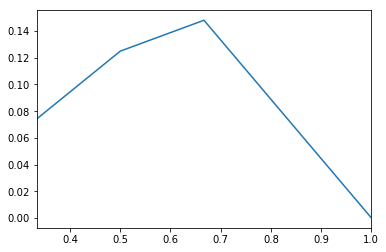

In [71]:
def maximum_likelihood_graph_1(prob_heads=[1/2, 1/3, 2/3, 1]):
    
    prob_coin_outcomes = [{1: prob_head, 0: 1-prob_head} for prob_head in prob_heads]
    prob_flips_given_coins = { prob_coin_outcome[1] : quiz_likelihood_1(prob=prob_coin_outcome) for prob_coin_outcome in prob_coin_outcomes }
    
    pd.Series(prob_flips_given_coins).plot(kind='line')

maximum_likelihood_graph_1()

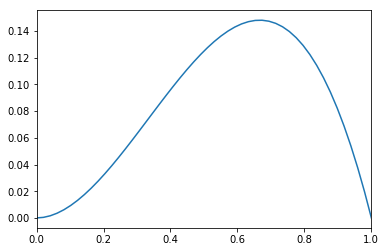

In [74]:
def maximum_likelihood_graph_2(num=50):
    """
    Probability of heads could've been anything from 0 to 1
    https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html
    How many points along this track should I check? num=50 is default
    """
    min_prob = 0
    max_prob = 1
    
    return maximum_likelihood_graph_1(prob_heads=np.linspace(min_prob,max_prob,num))

maximum_likelihood_graph_2()

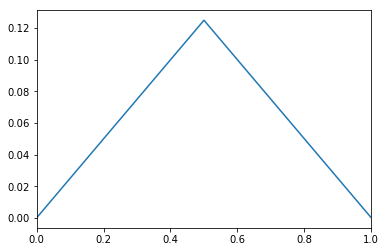

In [79]:
maximum_likelihood_graph_2(num=3)